In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

from statistics import mode
from scipy.special import binom
from scipy.stats import iqr

import sqlite3
import pandas.io.sql as sql
import pandas as pd
import sqlalchemy
!pip install ipython-sql

In [94]:
sales = pd.read_csv("../online/sales.csv", encoding="ISO-8859-1", dtype={'CustomerID': str}, index_col = [0])
sales.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total_purchase,Hour,Month,Week,Day,Year,Date
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,8,12,48,1,2010,2010-12-01
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850,United Kingdom,15.30,8,12,48,1,2010,2010-12-01
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850,United Kingdom,25.50,8,12,48,1,2010,2010-12-01
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850,United Kingdom,11.10,8,12,48,1,2010,2010-12-01
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850,United Kingdom,11.10,8,12,48,1,2010,2010-12-01


In [95]:
sqlalchemy.__version__

'1.4.41'

In [96]:
from IPython.display import IFrame
import datetime

In [97]:
from sqlalchemy import create_engine

In [99]:
engine=sqlalchemy.create_engine('sqlite:///onlineretail.db')
sales.to_sql('online2', engine)

357924

In [100]:
pd.read_sql('online2', engine)

,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total_purchase,Hour,Month,Week,Day,Year,Date
0,1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,8,12,48,1,2010,2010-12-01
1,5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850,United Kingdom,15.30,8,12,48,1,2010,2010-12-01
2,6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850,United Kingdom,25.50,8,12,48,1,2010,2010-12-01
3,7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850,United Kingdom,11.10,8,12,48,1,2010,2010-12-01
4,8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850,United Kingdom,11.10,8,12,48,1,2010,2010-12-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
357919,541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,10.20,12,12,49,9,2011,2011-12-09
357920,541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,12.60,12,12,49,9,2011,2011-12-09
357921,541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,16.60,12,12,49,9,2011,2011-12-09
357922,541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,16.60,12,12,49,9,2011,2011-12-09


In [101]:
%load_ext sql

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


In [103]:
%sql sqlite:///onlineretail.db
%sql Select sql FROM sqlite_master WHERE type='table';

 * sqlite:///onlineretail.db
Done.


sql
"CREATE TABLE online ( ""index"" BIGINT, ""Unnamed: 0"" BIGINT, ""InvoiceNo"" BIGINT, ""StockCode"" BIGINT, ""Description"" TEXT, ""Quantity"" BIGINT, ""InvoiceDate"" TEXT, ""UnitPrice"" FLOAT, ""CustomerID"" TEXT, ""Country"" TEXT, total_purchase FLOAT, ""Hour"" BIGINT, ""Month"" BIGINT, ""Week"" BIGINT, ""Day"" BIGINT, ""Year"" BIGINT, ""Date"" TEXT)"
"CREATE TABLE online1 ( ""index"" BIGINT, ""Unnamed: 0"" BIGINT, ""InvoiceNo"" BIGINT, ""StockCode"" BIGINT, ""Description"" TEXT, ""Quantity"" BIGINT, ""InvoiceDate"" TEXT, ""UnitPrice"" FLOAT, ""CustomerID"" TEXT, ""Country"" TEXT, total_purchase FLOAT, ""Hour"" BIGINT, ""Month"" BIGINT, ""Week"" BIGINT, ""Day"" BIGINT, ""Year"" BIGINT, ""Date"" TEXT, ""Number of transaction"" BIGINT, ""Num_transactions"" BIGINT)"
"CREATE TABLE online2 ( ""index"" BIGINT, ""InvoiceNo"" BIGINT, ""StockCode"" BIGINT, ""Description"" TEXT, ""Quantity"" BIGINT, ""InvoiceDate"" TEXT, ""UnitPrice"" FLOAT, ""CustomerID"" TEXT, ""Country"" TEXT, total_purchase FLOAT, ""Hour"" BIGINT, ""Month"" BIGINT, ""Week"" BIGINT, ""Day"" BIGINT, ""Year"" BIGINT, ""Date"" TEXT)"


In [104]:
con = sqlite3.connect('onlineretail.db') 

In [105]:
%%sql
SELECT * FROM online2 LIMIT 5;

 * sqlite:///onlineretail.db
Done.


index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total_purchase,Hour,Month,Week,Day,Year,Date
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,8,12,48,1,2010,2010-12-01
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850,United Kingdom,15.3,8,12,48,1,2010,2010-12-01
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850,United Kingdom,25.5,8,12,48,1,2010,2010-12-01
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850,United Kingdom,11.1,8,12,48,1,2010,2010-12-01
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850,United Kingdom,11.1,8,12,48,1,2010,2010-12-01


### Which Country made the highest number of transactions ?

In [107]:
%%sql

SELECT Country, SUM(total_purchase) as [Total Purchase], COUNT(InvoiceNo) AS num_transactions, COUNT(InvoiceNo)*100/SUM(DISTINCT num_transactions) AS [Percentage (%)]  
From online1
Group By Country
ORDER BY num_transactions DESC
LIMIT 6;


 * sqlite:///onlineretail.db
Done.


Country,Total Purchase,num_transactions,Percentage (%)
United Kingdom,6600848.360002254,318747,89
Germany,190010.19999999876,8091,2
France,173442.37999999995,7641,2
EIRE,242414.89999999848,6550,1
Netherlands,269330.17999999964,2221,0
Spain,43028.49000000005,2208,0


- Based on the query above, we can see that United Kingdom made the most transactions (318747) 

- Based on the query above, United Kingdom made the most transactions (89%) as compared to the other countries.

### b) Which product sold the most ?

In [108]:
%%sql

SELECT StockCode, Description, COUNT(Description) As [Purchases frequency] , SUM(Quantity) as [total sold]
FROM online2 
GROUP BY StockCode
ORDER BY [total sold] DESC
LIMIT 5;

 * sqlite:///onlineretail.db
Done.


StockCode,Description,Purchases frequency,total sold
23843,"PAPER CRAFT , LITTLE BIRDIE",1,80995
23166,MEDIUM CERAMIC TOP STORAGE JAR,198,77916
84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,472,54319
22197,SMALL POPCORN HOLDER,1060,49160
84879,ASSORTED COLOUR BIRD ORNAMENT,1392,35241


In [109]:
%%sql

SELECT StockCode, Description, COUNT(Description) As [Purchases frequency] , SUM(Quantity) as [total sold]
FROM online2
Group By StockCode
ORDER BY [Purchases frequency] DESC
LIMIT 5;

 * sqlite:///onlineretail.db
Done.


StockCode,Description,Purchases frequency,total sold
22423,REGENCY CAKESTAND 3 TIER,1711,12372
84879,ASSORTED COLOUR BIRD ORNAMENT,1392,35241
47566,PARTY BUNTING,1389,15279
20725,LUNCH BAG RED RETROSPOT,1304,17776
22720,SET OF 3 CAKE TINS PANTRY DESIGN,1151,7004


In [110]:
%%sql

SELECT StockCode, Description, COUNT(Description) As [Purchases frequency] , SUM(Quantity) as [total sold], round(SUM(total_purchase), 2) as [Total purchases ($)]
FROM online2
WHERE StockCode == '22423' OR StockCode == '23843'
GROUP BY StockCode
ORDER BY [Purchases frequency] DESC
LIMIT 5;

 * sqlite:///onlineretail.db
Done.


StockCode,Description,Purchases frequency,total sold,Total purchases ($)
22423,REGENCY CAKESTAND 3 TIER,1711,12372,142239.25
23843,"PAPER CRAFT , LITTLE BIRDIE",1,80995,168469.6


- 'PAPER CRAFT, LITTLE BIRDIE' were sold the most with 80995 product sold. However, the purchases frequency is only 1 times.
- In terms of product frequencies, we can see that 'REGENCY CAKESTAND 3 TIER' is the most popular product with 1711 transactions by customers. 
- As we compared the total sales of these two products, we can see that although 'PAPER CRAFT, LITTLE BIRDIE' have higher product sold, The sales contributes by 'REGENCY CAKESTAND 3 TIER' are still bigger compared to 'PAPER CRAFT, LITTLE BIRDIE'.

### Which product were purchased most  based on countries ?

#### United Kingdom

In [111]:
%%sql

SELECT Country, StockCode, Description, COUNT(Description) As [Purchases frequency] , SUM(Quantity) as [total sold], round(SUM(total_purchase), 2) as [Total purchases ($)]
FROM online2
WHERE Country == 'United Kingdom'
GROUP BY StockCode
ORDER BY [Purchases frequency] DESC
LIMIT 5;

 * sqlite:///onlineretail.db
Done.


Country,StockCode,Description,Purchases frequency,total sold,Total purchases ($)
United Kingdom,22423,REGENCY CAKESTAND 3 TIER,1417,9617,110713.0
United Kingdom,84879,ASSORTED COLOUR BIRD ORNAMENT,1320,32628,52228.68
United Kingdom,47566,PARTY BUNTING,1300,13980,63050.28
United Kingdom,20725,LUNCH BAG RED RETROSPOT,1135,13373,21333.85
United Kingdom,20727,LUNCH BAG BLACK SKULL.,1022,9859,15801.75


#### Germany

In [112]:
%%sql

SELECT Country, StockCode, Description, COUNT(Description) As [Purchases frequency] , SUM(Quantity) as [total sold], round(SUM(total_purchase), 2) as [Total purchases ($)]
FROM online2
WHERE Country == 'Germany'
GROUP BY StockCode
ORDER BY [Purchases frequency] DESC
LIMIT 5;

 * sqlite:///onlineretail.db
Done.


Country,StockCode,Description,Purchases frequency,total sold,Total purchases ($)
Germany,22326,ROUND SNACK BOXES SET OF4 WOODLAND,112,1221,3563.55
Germany,22328,ROUND SNACK BOXES SET OF 4 FRUITS,72,672,1982.4
Germany,22554,PLASTERS IN TIN WOODLAND ANIMALS,63,856,1412.4
Germany,22423,REGENCY CAKESTAND 3 TIER,63,809,9061.95
Germany,20719,WOODLAND CHARLOTTE BAG,58,1020,854.0


#### France

In [113]:
%%sql

SELECT Country, StockCode, Description, COUNT(Description) As [Purchases frequency] , SUM(Quantity) as [total sold], round(SUM(total_purchase), 2) as [Total purchases ($)]
FROM online2
WHERE Country == 'France'
GROUP BY StockCode
ORDER BY [Purchases frequency] DESC
LIMIT 5;

 * sqlite:///onlineretail.db
Done.


Country,StockCode,Description,Purchases frequency,total sold,Total purchases ($)
France,23084,RABBIT NIGHT LIGHT,73,4000,7234.24
France,21731,RED TOADSTOOL LED NIGHT LIGHT,70,1291,2130.15
France,22554,PLASTERS IN TIN WOODLAND ANIMALS,67,1143,1866.75
France,22556,PLASTERS IN TIN CIRCUS PARADE,66,1144,1868.4
France,22326,ROUND SNACK BOXES SET OF4 WOODLAND,62,636,1837.8


#### Ireland

In [114]:
%%sql

SELECT Country, StockCode, Description, COUNT(Description) As [Purchases frequency] , SUM(Quantity) as [total sold], round(SUM(total_purchase), 2) as [Total purchases ($)]
FROM online2
WHERE Country == 'EIRE'
GROUP BY StockCode
ORDER BY [Purchases frequency] DESC
LIMIT 5;

 * sqlite:///onlineretail.db
Done.


Country,StockCode,Description,Purchases frequency,total sold,Total purchases ($)
EIRE,22423,REGENCY CAKESTAND 3 TIER,63,641,7337.55
EIRE,22699,ROSES REGENCY TEACUP AND SAUCER,44,960,2550.0
EIRE,21790,VINTAGE SNAP CARDS,38,1420,1075.96
EIRE,23245,SET OF 3 REGENCY CAKE TINS,34,265,1209.35
EIRE,22697,GREEN REGENCY TEACUP AND SAUCER,34,459,1258.05


#### Netherlands

In [115]:
%%sql

SELECT Country, StockCode, Description, COUNT(Description) As [Purchases frequency] , SUM(Quantity) as [total sold], round(SUM(total_purchase), 2) as [Total purchases ($)]
FROM online2
WHERE Country == 'Netherlands'
GROUP BY StockCode
ORDER BY [Purchases frequency] DESC
LIMIT 5;

 * sqlite:///onlineretail.db
Done.


Country,StockCode,Description,Purchases frequency,total sold,Total purchases ($)
Netherlands,22629,SPACEBOY LUNCH BOX,28,4528,7485.6
Netherlands,22326,ROUND SNACK BOXES SET OF4 WOODLAND,25,3132,7991.4
Netherlands,22630,DOLLY GIRL LUNCH BOX,22,4132,6828.6
Netherlands,22328,ROUND SNACK BOXES SET OF 4 FRUITS,17,1584,4039.2
Netherlands,22029,SPACEBOY BIRTHDAY CARD,17,1884,678.96


#### The Most popular products are as below:
    - REGENCY CAKESTAND 3 TIER (United Kingdom & Ireland)
    - ROUND SNACK BOXES SET OF4 WOODLAND (Germany)
    - RABBIT NIGHT LIGHT (France)
    - SPACEBOY LUNCH BOX (Netherlands)

### TIME-SERIES ANALYSIS

This is a transactional data set which contains all the transactions occuring from 01/12/2010 until 09/12/2011 for a UK-based and registered non-store online retail.

In [125]:
%%sql 

SELECT MIN(InvoiceDate) as [Starting Analysis], MAX(InvoiceDate) as [Until]
FROM online2

 * sqlite:///onlineretail.db
Done.


Starting Analysis,Until
2010-12-01 08:26:00,2011-12-09 12:50:00


As the transactional data for 2010 obtained was only on December (means no data on Jan - Nov 2010), We cannot compare the total sales of all months for 2010 and 2011. Thus, We decide to compare the total sales based on December for both year (December 2010 and December 2011) to see the sales trend.

In [238]:
df1 = sales.pivot_table(index=['Country', 'UnitPrice', 'Quantity','Hour','Day', 'Week', 'Month', 'Year', 'Date' ], values='total_purchase', aggfunc='sum').reset_index()

In [239]:
df1 = df1.loc[df1.Month == 12].copy()

In [240]:
compare_year = df1.groupby ('Year')['total_purchase'].sum()

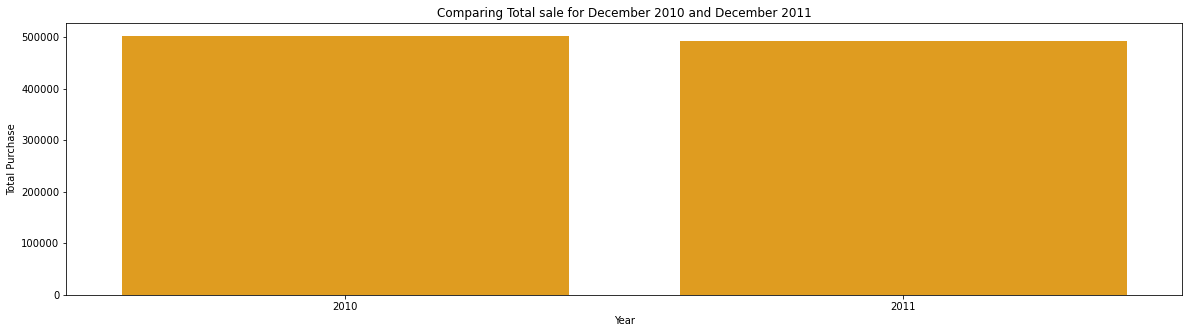

In [244]:
plt.figure(figsize = (20,5))
sns.barplot(compare_year.index, compare_year.values, order = compare_year.index, color='Orange')         
plt.ylabel("Total Purchase")
plt.xlabel("Year")
plt.title("Comparing Total sale for December 2010 and December 2011");

In [129]:
%%sql 

SELECT DISTINCT(Year),Month, Count(InvoiceNo) as [Number of transactions], round(SUM(Quantity*UnitPrice),2) as [Sales ($)]
FROM online2
WHERE Month == '12'
Group By Year
Order By Year
LIMIT 10;

 * sqlite:///onlineretail.db
Done.


Year,Month,Number of transactions,Sales ($)
2010,12,22657,502227.08
2011,12,15833,492938.89


The sales gained on december 2010 were higher compared to december 2011. From here, we can see that the sales trend drop slightly on December 2011 by  aproximately $9,289. 

### 2011 Sales Trend based on Month

In [132]:
%%sql 

SELECT Month, Count(InvoiceNo) as [Number of transactions], round(SUM(Quantity*UnitPrice), 2) as [Sales ($)]
FROM online2
WHERE Year == '2011'
Group By Month
Order By Month;

 * sqlite:///onlineretail.db
Done.


Month,Number of transactions,Sales ($)
1,18719,496215.92
2,17678,395363.89
3,24078,524778.96
4,20108,403975.41
5,25566,597737.61
6,24520,601596.86
7,23936,529324.28
8,24444,579155.19
9,36603,876697.47
10,45172,936472.98


In [135]:
%%sql 

SELECT Month, Count(InvoiceNo) as [Number of transactions], round(SUM(Quantity*UnitPrice), 2) as [Sales ($)]
FROM online2
WHERE Year == '2011'
Group By Month
Order By Month;

 * sqlite:///onlineretail.db
Done.


Month,Number of transactions,Sales ($)
1,18719,496215.92
2,17678,395363.89
3,24078,524778.96
4,20108,403975.41
5,25566,597737.61
6,24520,601596.86
7,23936,529324.28
8,24444,579155.19
9,36603,876697.47
10,45172,936472.98


In [187]:
time = sales.pivot_table(index=['Country', 'UnitPrice', 'Quantity','Hour','Day', 'Week', 'Month', 'Year', 'Date' ], values='total_purchase', aggfunc='sum').reset_index()

In [188]:
time.groupby(['Month', 'Year'])['total_purchase'].sum()

Month  Year
1      2011     496215.92
2      2011     395363.89
3      2011     524778.96
4      2011     403975.41
5      2011     597737.61
6      2011     601596.86
7      2011     529324.28
8      2011     579155.19
9      2011     876697.47
10     2011     936472.98
11     2011    1051973.60
12     2010     502227.08
       2011     492938.89
Name: total_purchase, dtype: float64

In [191]:
time = time.loc[time.Year == 2011].copy()

Month  Year
1      2011     496215.92
2      2011     395363.89
3      2011     524778.96
4      2011     403975.41
5      2011     597737.61
6      2011     601596.86
7      2011     529324.28
8      2011     579155.19
9      2011     876697.47
10     2011     936472.98
11     2011    1051973.60
12     2011     492938.89
Name: total_purchase, dtype: float64

In [196]:
month = time.groupby('Month')['total_purchase'].sum()
month

Month
1      496215.92
2      395363.89
3      524778.96
4      403975.41
5      597737.61
6      601596.86
7      529324.28
8      579155.19
9      876697.47
10     936472.98
11    1051973.60
12     492938.89
Name: total_purchase, dtype: float64

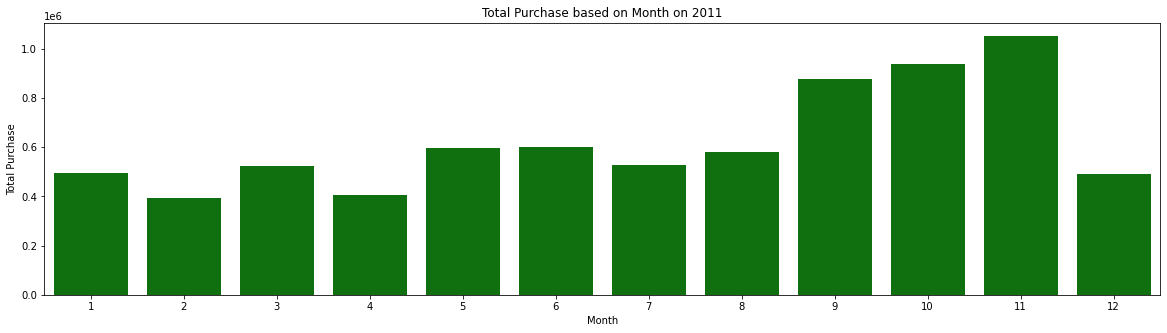

In [198]:
plt.figure(figsize = (20,5))
sns.barplot(month.index, month.values, order = month.index, color='Green')         
plt.ylabel("Total Purchase")
plt.xlabel("Month")
plt.title("Total Purchase based on Month on 2011");

### Sale trend based on number of transactions (2011)

In [246]:
df3 = sales.pivot_table(index=['Country', 'UnitPrice', 'Quantity','Hour','Day', 'Week', 'Month', 'Year', 'Date' ], values='InvoiceNo', aggfunc='count').reset_index()
df3

,Country,UnitPrice,Quantity,Hour,Day,Week,Month,Year,Date,InvoiceNo
0,Australia,0.19,96,12,24,47,11,2011,2011-11-24,1
1,Australia,0.19,240,15,17,20,5,2011,2011-05-17,1
2,Australia,0.25,432,10,3,9,3,2011,2011-03-03,3
3,Australia,0.29,48,15,13,28,7,2011,2011-07-13,1
4,Australia,0.29,240,13,15,24,6,2011,2011-06-15,1
...,...,...,...,...,...,...,...,...,...,...
184433,United Kingdom,295.00,1,15,4,5,2,2011,2011-02-04,1
184434,United Kingdom,295.00,1,16,26,21,5,2011,2011-05-26,1
184435,United Kingdom,295.00,1,18,2,48,12,2010,2010-12-02,1
184436,United Kingdom,649.50,1,15,10,23,6,2011,2011-06-10,1


In [247]:
df3= df3.loc[df3.Year == 2011].copy()

In [248]:
no_trans = df3.groupby('Month')['InvoiceNo'].sum()
no_trans

Month
1     18719
2     17678
3     24078
4     20108
5     25566
6     24520
7     23936
8     24444
9     36603
10    45172
11    58610
12    15833
Name: InvoiceNo, dtype: int64

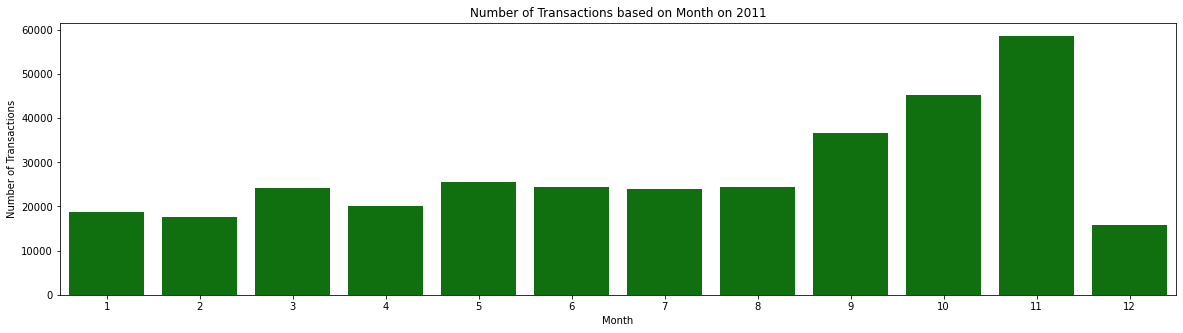

In [249]:
plt.figure(figsize = (20,5))
sns.barplot(no_trans.index, no_trans.values, order = no_trans.index, color='Green')         
plt.ylabel("Number of Transactions")
plt.xlabel("Month")
plt.title("Number of Transactions based on Month on 2011");

Based on the analysis, we can see that the highest total sales and number of transactions on 2011 are in between September until November with sudden decline of sales on December 2011. The decline of sales on December can be seen in all European Countries of this transactional data. 

### Most Popular product on Sep - Nov 2011

In [261]:
%%sql 

SELECT Month, Description, Count(InvoiceNo) as [Number of transactions], round(SUM(Quantity*UnitPrice), 2) as [Sales ($)]
FROM online2
WHERE Year == '2011' 
Group By Month
Order By [Number of transactions] DESC
LIMIT 3;

 * sqlite:///onlineretail.db
Done.


Month,Description,Number of transactions,Sales ($)
11,SMALL GLASS HEART TRINKET POT,58610,1051973.6
10,CHILLI LIGHTS,45172,936472.98
9,PINK POLKADOT BOWL,36603,876697.47


From this data, we can deduce that the increased of sale on these months was caused by the preparation for Christmas by the wholesaler which will happened at the end of December. This reflect back at the cause for the sudden decline of sales on december. As the customer are wholesaler, by logic, they'll need to purchase/restock the products before christmas.

### Customers Frequencies

In [217]:
%%sql 

SELECT CustomerID, Count(InvoiceNo) as [Number of transactions], round(SUM(Quantity*UnitPrice), 2) as [Sales ($)]
FROM online2
Group By CustomerID
Order By [Number of transactions] DESC
LIMIT 5;

 * sqlite:///onlineretail.db
Done.


CustomerID,Number of transactions,Sales ($)
17841,6940,36345.85
14911,5102,125430.46
14096,4558,48391.76
12748,3969,28646.49
14606,2328,10499.99


Customer with Customer ID of '17841' made most of the transactions (6940)

### Customer Loyalty and favourite products

In [225]:
%%sql 

SELECT CustomerID, InvoiceDate, Description, InvoiceNo, Quantity, round(SUM(Quantity*UnitPrice), 2) as [Sales ($)]
FROM online2
WHERE CustomerID == '17841'
Group By InvoiceDate;

 * sqlite:///onlineretail.db
Done.


CustomerID,InvoiceDate,Description,InvoiceNo,Quantity,Sales ($)
17841,2010-12-01 14:41:00,SKULLS AND CROSSBONES WRAP,536557,25,508.48
17841,2010-12-03 14:35:00,12 RED ROSE PEG PLACE SETTINGS,536984,1,292.19
17841,2010-12-06 14:51:00,CHILLI LIGHTS,537405,30,366.54
17841,2010-12-09 17:27:00,JUMBO BAG OWLS,538163,1,235.55
17841,2010-12-14 14:40:00,CABIN BAG VINTAGE RETROSPOT,538866,3,619.59
17841,2010-12-19 13:59:00,LOVE HEART NAPKIN BOX,539469,1,241.43
17841,2011-01-04 12:51:00,DISCO BALL CHRISTMAS DECORATION,540021,24,480.68
17841,2011-01-09 14:36:00,CHILLI LIGHTS,540538,34,272.07
17841,2011-01-12 12:31:00,WOODEN ADVENT CALENDAR RED,540943,2,206.13
17841,2011-01-16 13:51:00,PINK HEART SHAPE EGG FRYING PAN,541253,1,226.4


In [233]:
%%sql 

SELECT CustomerID, Description, InvoiceNo,Count(Description) as [Number of transactions], SUM(Quantity) as [Quantity Bought], round(SUM(Quantity*UnitPrice), 2) as [Sales ($)]
FROM online2
WHERE CustomerID == '17841'
Group By Description
Order By [Quantity Bought] DESC;

 * sqlite:///onlineretail.db
Done.


CustomerID,Description,InvoiceNo,Number of transactions,Quantity Bought,Sales ($)
17841,DISCO BALL CHRISTMAS DECORATION,536557,38,1776,207.36
17841,CHILLI LIGHTS,536557,63,587,2792.65
17841,HEART DECORATION RUSTIC HANGING,571498,8,384,72.96
17841,GUMBALL COAT RACK,541253,46,271,642.45
17841,ASSORTED COLOUR LIZARD SUCTION HOOK,540021,37,260,109.2
17841,SET OF 3 WOODEN HEART DECORATIONS,559807,34,243,303.75
17841,GINGHAM HEART DECORATION,544311,33,232,197.2
17841,SKULLS AND CROSSBONES WRAP,536557,9,225,94.5
17841,POPART WOODEN PENCILS ASST,561113,1,200,8.0
17841,BLUE/CREAM STRIPE CUSHION COVER,550006,49,198,247.5


The transactions made by Customer with CustomerID '17841' had been occuring since 2010 until December 2011 with different type of products bought.This online retail mainly sells unique all-occasion gifts and many customers of the retail are wholesalers.

### Conclusion

This is a transactional data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 of European Countries. This register non-store online retail is a UK-based. The company mainly sells unique all-occasion gifts and many customers of this online retail are wholesalers.

As the data analysed only covered from Dec 2010 to Dec 2011, we can't compare the total sales trend between 2010 to 2011. However, we can see the trend by comparing the sale trend for December 2010 and December 2011. The sales on december 2011 are slightly lower than sales in december 2010 by ~$10,000. The highest transactions and sales occured on the fourth quarter of the year (especially September, October and November). 